# Adding QR codes to a figure
awojdyla@lbl.gov, July 2024

In this script, we try to generate qr codes on the fly and add them to a figure, so that the data can be retrieved later.\

We also try to ensure that the data had units associated with it, with the hope of being able to transfer this as a meta information.

Disclaimer: a portion of this code was generated using LLM (GPT 4.0), since I have no idea what you can do with QR codes. Very nice actually!

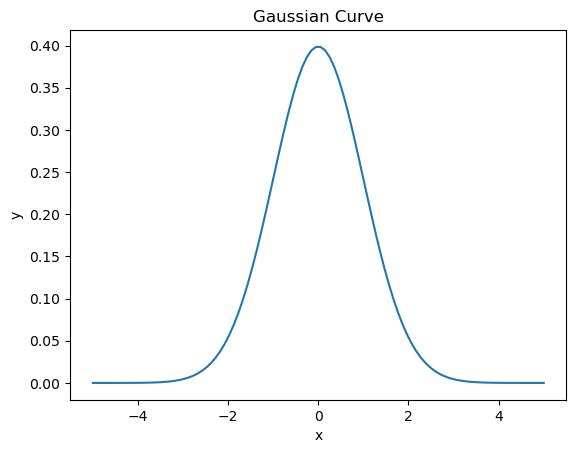

/Users/awojdyla/anaconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


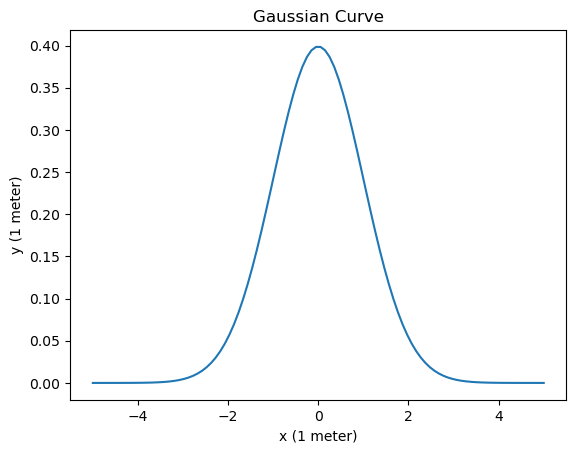

In [1]:
import numpy as np
import pint

import matplotlib.pyplot as plt

# Define the parameters of the Gaussian curve
mean = 0
std_dev = 1

# Generate x values
x = np.linspace(-5, 5, 100)

# Calculate the corresponding y values using the Gaussian formula
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Plot the Gaussian curve
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gaussian Curve')
plt.show()
# Create a unit registry
ureg = pint.UnitRegistry()

# Define the units
x_unit = ureg('meter')
y_unit = ureg('meter')

# Convert the x and y values to the desired units
x = x * x_unit
y = y * y_unit

# Plot the Gaussian curve with units
plt.plot(x, y)
plt.xlabel(f'x ({x_unit})')
plt.ylabel(f'y ({y_unit})')
plt.title('Gaussian Curve')
plt.show()

In [ ]:
#install qrcode if needed (uncomment in jupyter)
# !pip install qrcode

## Generate a generic QR code

In [2]:
import qrcode

# Define the string to encode
data = "Hello, World!"

# Create a QR code instance
qr = qrcode.QRCode(version=1, error_correction=qrcode.constants.ERROR_CORRECT_H, box_size=10, border=4)

# Add data to the QR code
qr.add_data(data)

# Make the QR code
qr.make(fit=True)

# Create an image from the QR code
image = qr.make_image(fill_color="black", back_color="white")

# Save the image
image.save("qr_code.png")

In [3]:
## Affix a QR code to a plot

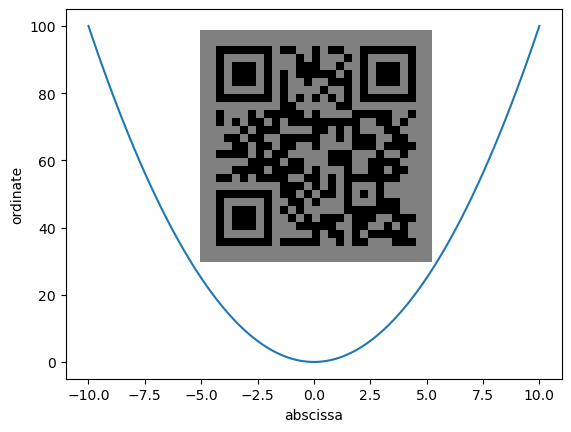

In [21]:
import numpy as np
import qrcode

import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-10, 10, 100)

# Define quadratic function
def quadratic_function(x):
    return x**2

# Generate y values using the quadratic function
y = quadratic_function(x)

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the quadratic function
ax.plot(x, y)
ax.set_xlabel('abscissa')
ax.set_ylabel('ordinate')

# Create a QR code
qr = qrcode.QRCode(version=1, box_size=8, border=2)
qr.add_data("https://dreambeam.lbl.gov")  # Replace with your desired URL
qr.make(fit=True)
qr_image = qr.make_image(fill_color="black", back_color="gray")

# Add the QR code to the top right corner of the figure
fig.figimage(qr_image, xo=200, yo=170)

# Save the figure as a PNG
fig.savefig("figure_with_qrcode.png")

## attempt to generate a DOI for the data

This will not work (you need to send a proper payload and provide your registration), but it's not too far from working.

https://support.datacite.org/docs/api-create-dois

To be able to register a DOI, you need to be a [member of DataCite(https://datacite.org/become-a-member/). The cost per individual is [about $2000/year](https://datacite.org/fee-model/) for up to 2000 DOIs. If you're working with DOE, you are probably part of a consortium, and you should be able to use [Bluesky-Tiled](https://github.com/bluesky/tiled) to generate DOI. You can also register you data using Zenodo if yo have an ORCID (it's a very manual process).

In [14]:
import requests

# Define the metadata for your dataset
metadata = {
    "title": "My Dataset",
    "author": "Antoine Islegen-Wojdyla",
    "description": "This is a dataset testing the DataCite API.",
    # Add more metadata fields as needed
}

# Send a POST request to DataCite API to register the dataset and generate a DOI
response = requests.post("https://api.datacite.org/dois", json=metadata)

# Check if the request was successful
if response.status_code == 201:
    doi = response.json()["data"]["id"]
    print("DOI generated:", doi)
else:
    print("DOI generation failed. Status code:", response.status_code)

DOI generation failed. Status code: 401
